<a href="https://colab.research.google.com/github/DonRoboto/AprendizajeAutomatizado/blob/master/CONTINUOUS_RANDOM_VARIATES/Acceptance_Rejection_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import beta

In [0]:
def F(x):
  if 0<x and x<1:
    r = (60 * (x**3)) * ((1 - x)**2)
  else:
    r = 0
  return r  

In [0]:
def C(x):
  if 0<x and x<1:
    r = 2.0736
  else:
    r=0
  return r 

In [0]:
def T(x):
  r = (F(x))/C(x)
  return r 

In [0]:
x = np.linspace(0, 1, 10000)
y = [0] * len(x)

In [0]:
a = 4
b = 3
rv = beta(a, b)

for i in range(len(x)):
  y[i] = rv.pdf(x[i])

In [0]:
num_simulaciones = 100000
data = []

for k in range(num_simulaciones):
    Y = np.random.uniform(0,1)
    U = np.random.uniform(0,1)

   
    while U > T(Y):
      Y = np.random.uniform(0,1)
      U = np.random.uniform(0,1)
    
    data.append(Y)

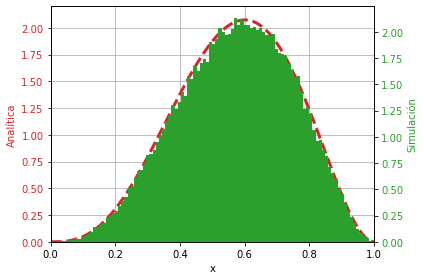

In [34]:
fig, ax1 = plt.subplots()
plt.grid(True)
plt.ylim(top=2.2)
plt.ylim(bottom=0)


color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('Analítica', color=color)
ax1.plot(x, y, 'r--', color=color, linewidth=3.0)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 1)

ax2 = ax1.twinx()  

color = 'tab:green'
ax2.set_ylabel('Simulación', color=color)  
ax2.hist(data,bins=100, color=color, density=True)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()